# Of All energy types, which are the most prevalent worldwide?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### Energy sources are in separate csv files.  Many data sources need to be combined into one.

In [162]:
#combining all datasets using map function

import glob
import pandas as pd 

#map renewables

df_renew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df_renew.rename(columns={'Country or Area':'Geo'}, inplace=True)

#map nonrenewables

df_nonrenew = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_nonrenewable/*.csv')))
df_nonrenew.rename(columns={'Country or Area':'Geo'}, inplace=True)

df = pd.concat([df_renew, df_nonrenew])

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

df = df[df['Transaction'] == 'final consumption']

df.sample(20)




,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
15488,Slovakia,Naphtha - Final consumption,2013.0,"Metric tons, thousand",264.000000,NaN,naphtha,final consumption
18121,Namibia,Other bituminous coal - final consumption,2009.0,"Metric tons, thousand",0.000000,NaN,other bituminous coal,final consumption
14872,United States,Biogases - Final consumption,2005.0,Terajoules,81142.000000,NaN,biogases,final consumption
63935,Serbia,Natural gas (including LNG) - final consumption,2008.0,Terajoules,66070.000000,NaN,natural gas (including lng),final consumption
63790,United Rep. of Tanzania,Fuelwood - Final consumption,2006.0,"Cubic metres, thousand",40299.288451,NaN,fuelwood,final consumption
53419,Iran (Islamic Rep. of),Gas Oil/ Diesel Oil - Final consumption,2012.0,"Metric tons, thousand",24051.348999,NaN,gas oil/ diesel oil,final consumption
14020,Guyana,Charcoal - Final consumption,1997.0,"Metric tons, thousand",1.270000,NaN,charcoal,final consumption
21059,Dominican Republic,Liquefied petroleum gas (LPG) - Final consumption,1991.0,"Metric tons, thousand",178.000000,NaN,liquefied petroleum gas (lpg),final consumption
10972,Kyrgyzstan,Brown coal - final consumption,1997.0,"Metric tons, thousand",406.000000,NaN,brown coal,final consumption
1793,Lithuania,Peat products - final consumption,2012.0,"Metric tons, thousand",73.000000,NaN,peat products,final consumption


In [163]:
#import dataframe with conversion units
import pandas as pd 
unit_conv = pd.read_csv('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/renewable_energy_units_conv_2.csv')

In [164]:
#merge dataframes with conversion units

df_merge = pd.merge(df,  
                     unit_conv,  
                     on ='Commodity', 
                     how ='left') 

df_merge['TJ'] = df_merge['Quantity'] * df_merge['Conv_mt_to_tj']
df_merge.sample(2)

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction,Description,Units,Conv_mt_to_tj,r_type,TJ
29699,Zambia,Bitumen - Final consumption,2015.0,"Metric tons, thousand",6.0,NaN,bitumen,final consumption,"Asphalt, also known as bitumen, is a sticky, b...","Metric tons, thousand",40.2,nonrenewable,241.2
22773,Mexico,Anthracite - Final consumption,2010.0,"Metric tons, thousand",48.0,NaN,anthracite,final consumption,"Anthracite, also known as hard coal, is a hard...","Metric tons, thousand",25.8,nonrenewable,1238.4


## ii.All Energy Sources Metrics 2018

#### All energy sources 'final consumption'

In [165]:

#sum all energy sources by year from 1990 to 2018
lt_2019 = df_merge[df_merge['Year'] < 2019]
tot_grp_year = lt_2019.groupby(['Year'])
df_tot_year = tot_grp_year['TJ'].agg(['sum'])

#sum all renewables
lt_2019_r = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'renewable')]
tot_r_grp_year = lt_2019_r.groupby(['Year'])
df_tot_year_r = tot_r_grp_year['TJ'].agg(['sum'])

#sum all nonrenewables
lt_2019_n = df_merge[(df_merge['Year'] < 2019) & (df_merge['r_type'] == 'nonrenewable')]
tot_n_grp_year = lt_2019_n.groupby(['Year'])
df_tot_year_n = tot_n_grp_year['TJ'].agg(['sum'])

In [166]:
# ***sum renewable & nonrenewable in the same way and change plot below to subplot w/ three lines

In [167]:
allsources_r = pd.merge(df_tot_year,  
                     df_tot_year_r,  
                     on ='Year', 
                     how ='left') 

allsources_r_n = pd.merge(allsources_r,
                    df_tot_year_n,
                    on = 'Year', 
                    how = 'left')

allsources_r_n.rename(columns={'sum_x':'total', 'sum_y': 'renew', 'sum' : 'nonrenew'}, inplace=True)
#allsources_r_n['diff'] = allsources_r_n['renew'] + allsources_r_n['nonrenew']#

allsources_r_n.head()

,total,renew,nonrenew
Year,,,
1990.0,1.880782e+08,3.027756e+07,1.578006e+08
1991.0,1.912080e+08,3.099118e+07,1.602169e+08
1992.0,1.929385e+08,3.191184e+07,1.610267e+08
1993.0,1.941834e+08,3.163286e+07,1.625505e+08
1994.0,1.935882e+08,3.151730e+07,1.620709e+08


AxesSubplot(0.08,0.07;0.87x0.81)


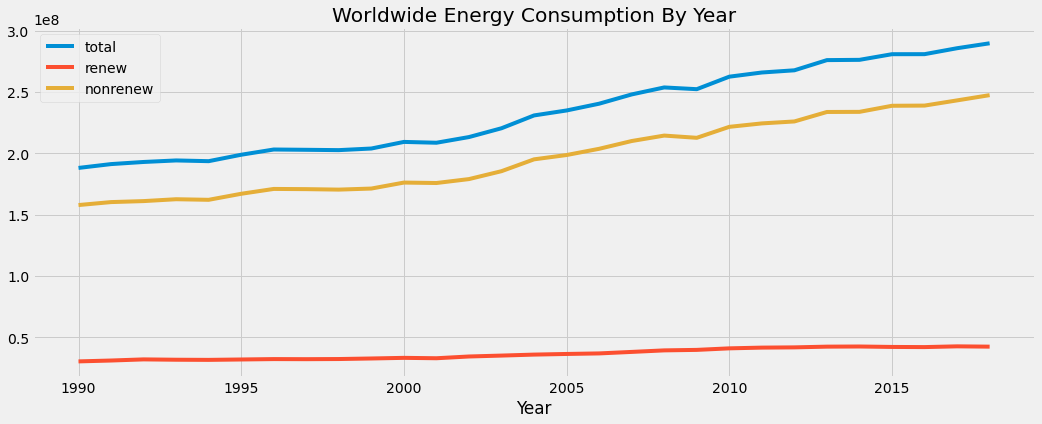

In [168]:
import matplotlib.pyplot as plt 

df_tot_year.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_r.sort_values(by='Year', ascending=True, inplace=True)
df_tot_year_n.sort_values(by='Year', ascending=True, inplace=True)

print(allsources_r_n.plot(figsize=(16,6), title='Worldwide Energy Consumption By Year'))


In [169]:
#what was the percent renewable in 2018?

df_r_type_18 = df_merge[df_merge['Year'] == 2018]
r_grp_18 = df_r_type_18.groupby(['r_type'])
sum_r_type = r_grp_18['TJ'].agg(['sum'])
sum_r_type['percent'] = (sum_r_type['sum'] / sum_r_type['sum'].sum()) * 100
sum_r_type.head()

,sum,percent
r_type,,
nonrenewable,2.474427e+08,85.400456
renewable,4.230130e+07,14.599544


#### Percent renewable?

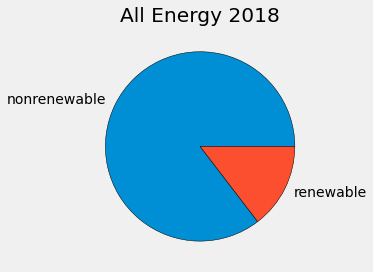

In [170]:
from matplotlib import pyplot as plt 

pie = sum_r_type['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2018")
plt.tight_layout()
plt.show()



In [171]:
#what was the percent renewable in 2013?
df_r_type_13 = df_merge[df_merge['Year'] == 2013]
r_grp_13 = df_r_type_13.groupby(['r_type'])
sum_r_type_13 = r_grp_13['TJ'].agg(['sum'])
sum_r_type_13['percent'] = (sum_r_type_13['sum'] / sum_r_type_13['sum'].sum()) * 100
sum_r_type.head()

,sum,percent
r_type,,
nonrenewable,2.474427e+08,85.400456
renewable,4.230130e+07,14.599544


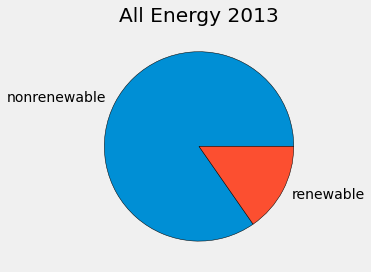

In [172]:
from matplotlib import pyplot as plt 

pie = sum_r_type_13['sum']
labels = ['nonrenewable', 'renewable']

#plt.style.use("fivethirtyeight")

plt.pie(pie, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title("All Energy 2013")
plt.tight_layout()
plt.show()

In [173]:
#filter 2018, group by Commodity, sum of TJ
df_2018 = df_merge[df_merge['Year'] == 2018]
comm_grp_18 = df_2018.groupby(['Commodity'])
sum_2018 = comm_grp_18['TJ'].agg(['sum'])

#same thing for 2013

df_2013 = df_merge[df_merge['Year'] == 2013]
comm_grp_13 = df_2013.groupby(['Commodity'])
sum_2013 = comm_grp_13['TJ'].agg(['sum'])



In [174]:
#change 'sum' heading to TJ 2018, TJ 2013
sum_2018.rename(columns={'sum' : 'Total TJ 2018'}, inplace=True)
sum_2013.rename(columns={'sum' : 'Total TJ 2013'}, inplace=True)

In [175]:
#combine 2018 and 2013 data frames to get percentage change
allsources_change = pd.concat([sum_2013, sum_2018], axis='columns', sort=False)

In [176]:
sum_2018.head()

,Total TJ 2018
Commodity,
animal waste,5.938348e+05
anthracite,2.608060e+05
aviation gasoline,7.761452e+04
bagasse,2.282392e+06
biodiesel,1.738720e+06


AxesSubplot(0.08,0.07;0.87x0.81)


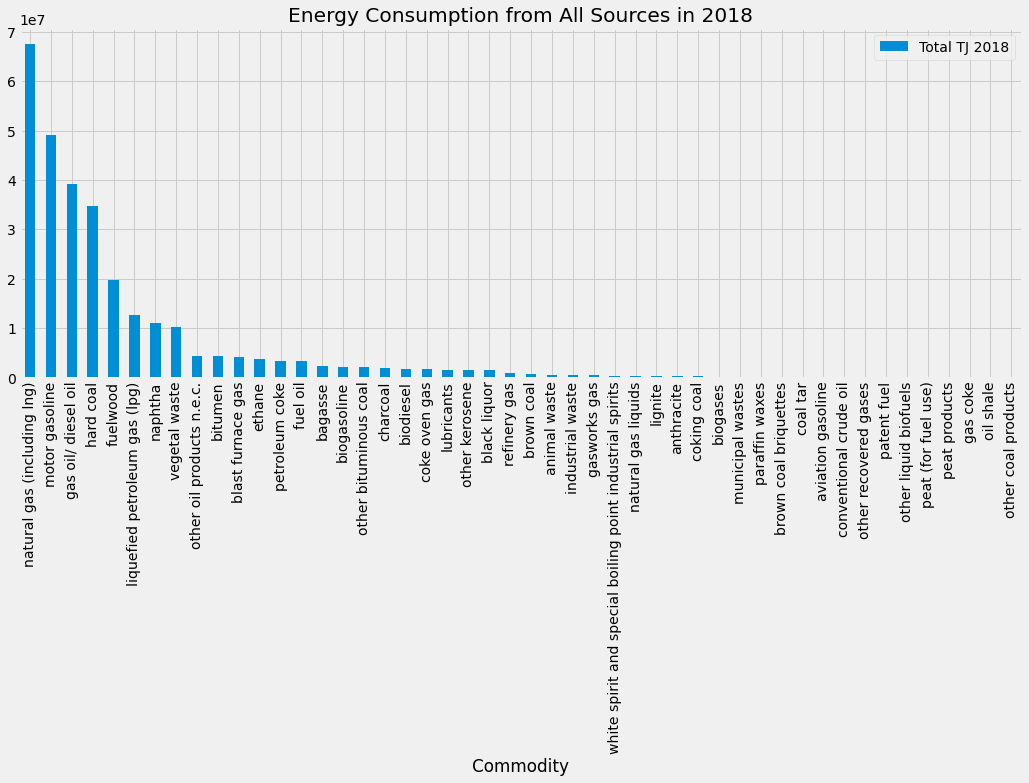

In [177]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2018.sort_values(by='Total TJ 2018', ascending=False, inplace=True)

print(sum_2018.plot(kind='bar', figsize=(16,6), title='Energy Consumption from All Sources in 2018'))

AxesSubplot(0.08,0.07;0.87x0.81)


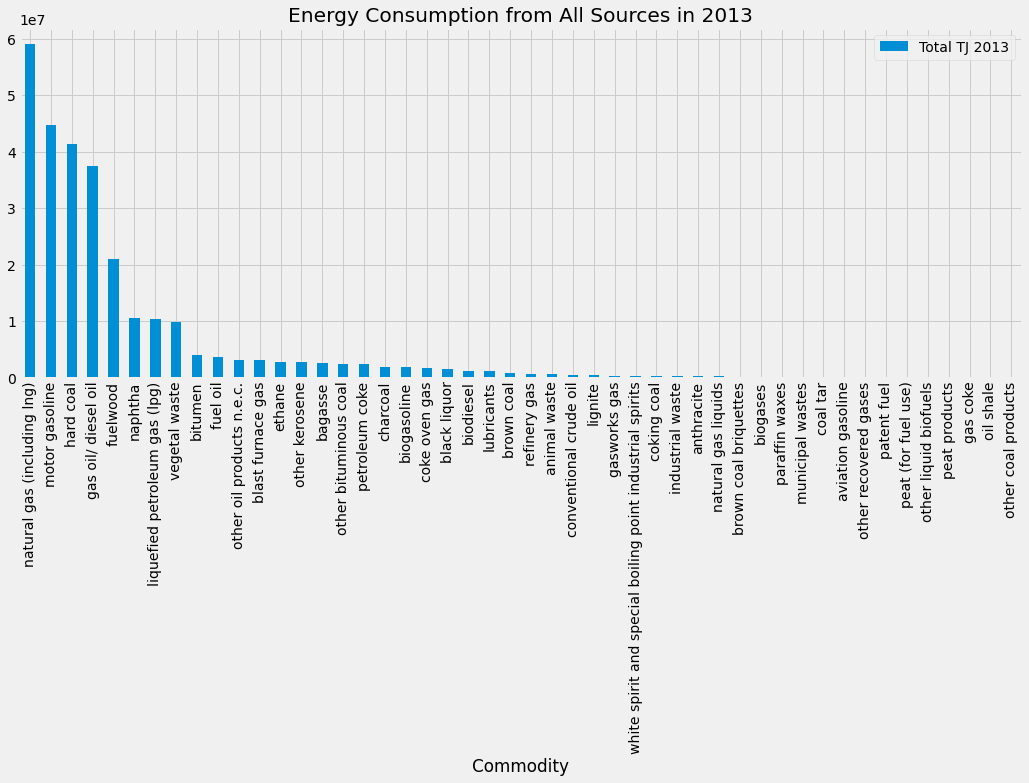

In [178]:
import matplotlib.pyplot as plt 

# pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
# pc_only.sort_values(by='perc_change', ascending=False, inplace=True)
sum_2013.sort_values(by='Total TJ 2013', ascending=False, inplace=True)

print(sum_2013.plot(kind='bar', figsize=(16,6), title='Energy Consumption from All Sources in 2013'))

In [179]:
allsources_change['change'] = allsources_change['Total TJ 2018'] - allsources_change['Total TJ 2013']
allsources_change['perc_change'] = (allsources_change['change'] / allsources_change['Total TJ 2013']) * 100
allsources_change.sort_values(by='perc_change', ascending=False)

,Total TJ 2013,Total TJ 2018,change,perc_change
Commodity,,,,
other liquid biofuels,1.435760e+04,2.293380e+04,8.576200e+03,59.732824
oil shale,2.109300e+03,3.257400e+03,1.148100e+03,54.430380
biodiesel,1.147236e+06,1.738720e+06,5.914831e+05,51.557210
lubricants,1.094999e+06,1.576357e+06,4.813580e+05,43.959668
natural gas liquids,2.335970e+05,3.335774e+05,9.998040e+04,42.800378
industrial waste,3.279480e+05,4.573397e+05,1.293917e+05,39.454958
other oil products n.e.c.,3.170210e+06,4.400704e+06,1.230495e+06,38.814292
petroleum coke,2.414234e+06,3.311283e+06,8.970481e+05,37.156629
blast furnace gas,3.100425e+06,4.236203e+06,1.135777e+06,36.632955


AxesSubplot(0.08,0.07;0.87x0.81)


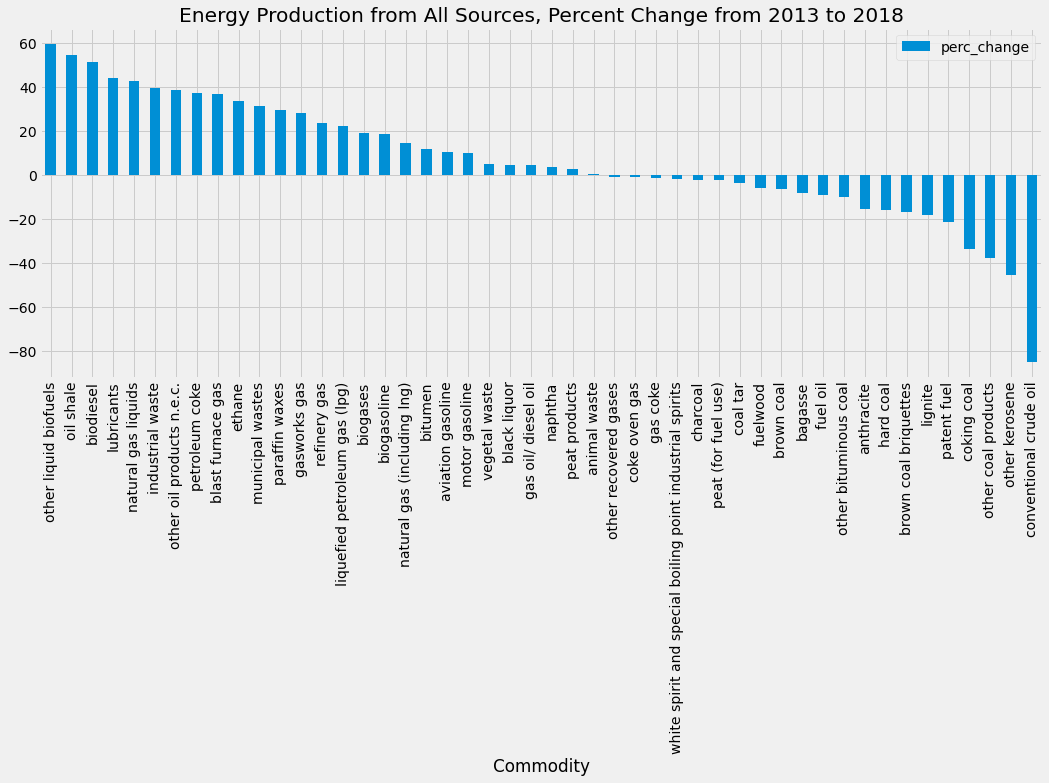

In [180]:
import matplotlib.pyplot as plt 

pc_only = allsources_change.drop(['Total TJ 2018', 'Total TJ 2013', 'change'],axis=1)
pc_only.sort_values(by='perc_change', ascending=False, inplace=True)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources, Percent Change from 2013 to 2018'))

AxesSubplot(0.08,0.07;0.87x0.81)


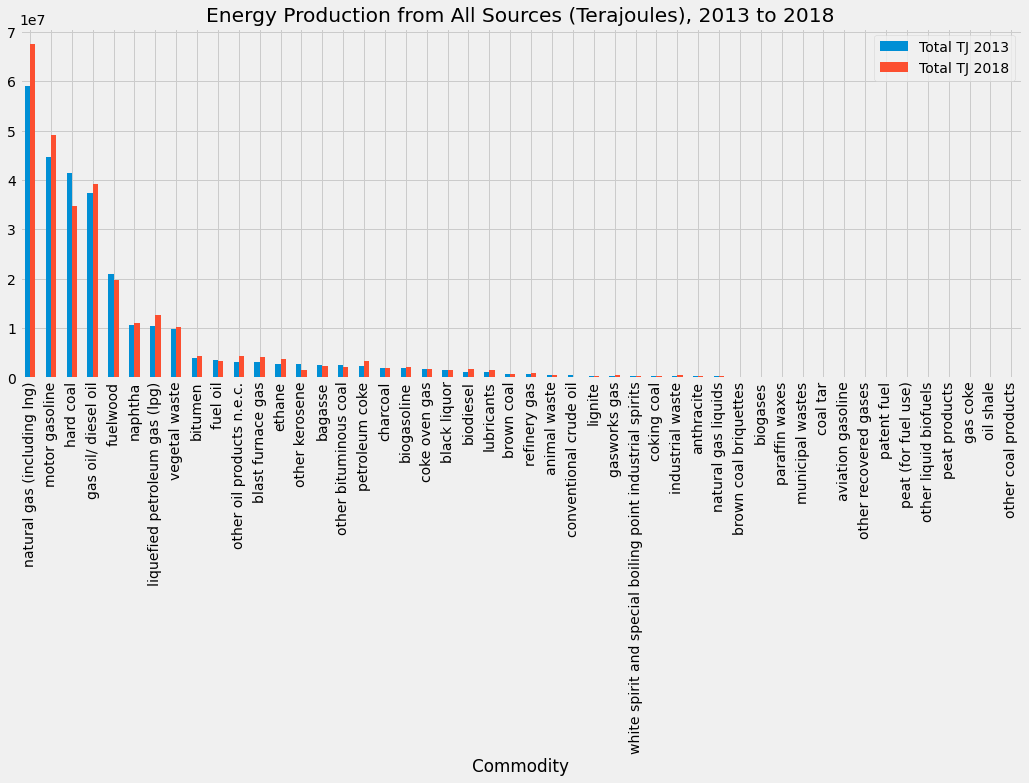

In [181]:
import matplotlib.pyplot as plt 
no_pc = nonrenew_change.drop(['change', 'perc_change'], axis=1)
no_pc.sort_values(by='Total TJ 2013', ascending=False, inplace=True)

print(no_pc.plot(kind='bar', figsize=(16,6), title='Energy Production from All Sources (Terajoules), 2013 to 2018'))

## v.Insights